In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=False)

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
import random
print(tf.__version__)

2.5.0


In [3]:
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
#Using ImageDataGenerator to ease Data preparation as it lables images based on Folder Name which is ideal for the way Data Set is arranged
TRAINING_DIR = "/content/gdrive/MyDrive/VEHICLE CLASSIFICATION USING CNN/Dataset/Train"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 1437 images belonging to 4 classes.


In [4]:
VALIDATION_DIR = "/content/gdrive/MyDrive/VEHICLE CLASSIFICATION USING CNN/Dataset/Validation"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 502 images belonging to 4 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [7]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)
                              
model.save('CNNmodel1.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
 2/15 [===>..........................] - ETA: 4s - loss: 1.7897 - accuracy: 0.3139  

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


15/15 [==============================] - 747s 51s/step - loss: 1.6063 - accuracy: 0.4224 - val_loss: 0.9514 - val_accuracy: 0.6554
Epoch 2/10
15/15 [==============================] - 25s 2s/step - loss: 0.6478 - accuracy: 0.7697 - val_loss: 0.4505 - val_accuracy: 0.8327
Epoch 3/10
15/15 [==============================] - 25s 2s/step - loss: 0.3867 - accuracy: 0.8566 - val_loss: 0.2679 - val_accuracy: 0.9203
Epoch 4/10
15/15 [==============================] - 24s 2s/step - loss: 0.2607 - accuracy: 0.9144 - val_loss: 0.1723 - val_accuracy: 0.9382
Epoch 5/10
15/15 [==============================] - 25s 2s/step - loss: 0.1776 - accuracy: 0.9436 - val_loss: 0.1207 - val_accuracy: 0.9701
Epoch 6/10
15/15 [==============================] - 24s 2s/step - loss: 0.1210 - accuracy: 0.9582 - val_loss: 0.0779 - val_accuracy: 0.9821
Epoch 7/10
15/15 [==============================] - 24s 2s/step - loss: 0.0734 - accuracy: 0.9833 - val_loss: 0.0479 - val_accuracy: 0.9861
Epoch 8/10
15/15 [===========

<Figure size 432x288 with 0 Axes>

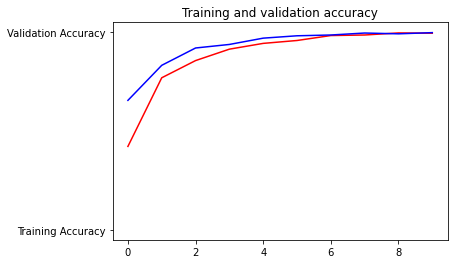

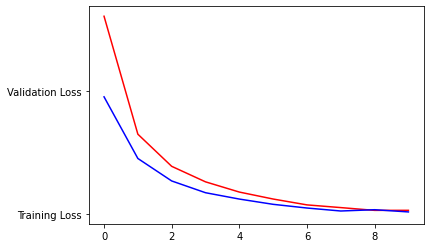

<Figure size 432x288 with 0 Axes>

In [9]:
#Visualisation
 
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

# #-----------------------------------------------------------
# # Retrieve a list of  results on training and test data
# # sets for each training epoch
# #-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs
# #------------------------------------------------
# # Plot training and validation accuracy per epoch
# #------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
# #------------------------------------------------
# # Plot training and validation loss per epoch
# #------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

image = keras.preprocessing.image
model = keras.models.load_model('/content/CNNmodel1.h5')
#path to any image to be predicted
path = '/content/test2.JPG'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#[x] can be an array of images 
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)

[[1. 0. 0. 0.]]
